# Db Connection



In [1]:
import pymongo

mongo_host = 'localhost'
mongo_port = '27017'
db_name = 'HOMEWORK-DATABASE'

db_address = ('mongodb://' + mongo_host + ':' + mongo_port + '/')
db_client = pymongo.MongoClient(db_address)
no_sql_db = db_client.get_database(db_name)


In [2]:
def get_avg_ratings(collection, genre, min_votes) :
    ratings = []
    pipeline = [{'$match': {'genres': {'$elemMatch': {'$eq': genre}},
  'numvotes' : {'$gt' : 10000}}}]
    for doc in list(collection.aggregate(pipeline)):
        ratings.append(doc['avgrating'])
    return ratings
    

In [4]:
movies = no_sql_db.get_collection("Movies")
ratings = {}
for genre in movies.distinct("genres"):
    ratings[genre] = get_avg_ratings(movies, genre, 10000)

In [6]:
len(ratings)

25

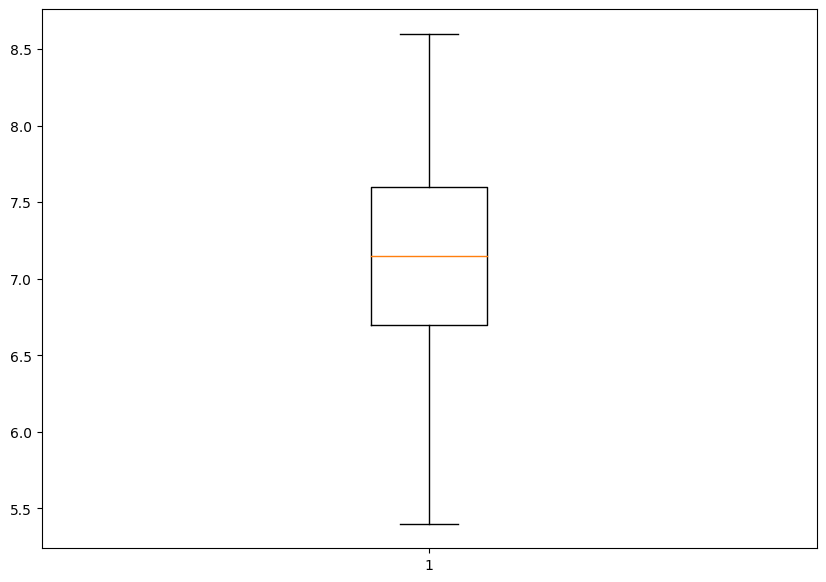

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(ratings['Action'])
 
# show plot
plt.show()

In [8]:
# Subplots are organized in a Rows x Cols Grid
# Tot and Cols are known

Tot =  len(ratings)  #number_of_subplots
Cols = 4

# Compute Rows required

Rows = Tot // Cols 

#     EDIT for correct number of rows:
#     If one additional row is necessary -> add one:

if Tot % Cols != 0:
    Rows += 1

# Create a Position index

Position = range(1,Tot + 1)

# Create main figure

fig = plt.figure(1, figsize=(300, 300))

for k in range(Tot):
#     print("k:\t",k)
    # add every single subplot to the figure with a for loop
    ax = fig.add_subplot(Rows,Cols,Position[k]) 
    genre = list(ratings.keys())[k]
    data = ratings[genre]
    ax.boxplot(data)
    ax.set_title(genre)
plt.savefig("plots_q1.png")
plt.show()